# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependecies
import requests
import pandas as pd
import numpy as np
from citipy import citipy
from api_keys import weather_api_key
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%reload_ext lab_black

## Generate Cities List

In [2]:
# Create list of 500+ cities
lat_list = np.random.uniform(-90, 90, 1500)
lng_list = np.random.uniform(-180, 180, 1500)

# combine list to create coodinates
coords_list = list(zip(lat_list, lng_list))

In [3]:
# set up lists to hold reponse info
cities = []
countries = []
# find closest city using citypy
for coords in coords_list:

    city = citipy.nearest_city(coords[0], coords[1]).city_name
    country = citipy.nearest_city(coords[0], coords[1]).country_code

    if city not in cities:
        cities.append(city)

len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
def extract_data(data):
    return {
        "name": data["name"],
        "lat": data["coord"]["lat"],
        "lng": data["coord"]["lon"],
        "max_temp_f": data["main"]["temp_max"],
        "humidity": data["main"]["humidity"],
        "cloudiness": data["clouds"]["all"],
        "windspeed": data["wind"]["speed"],
        "country": data["sys"]["country"],
        "date": data["dt"],
    }

In [5]:
# create empty list for appending extracted data
city_results = []

# set beginning print statments for output
print("Beginning Data Retrieval")
print("-" * 25)

# set up record counter for output
record_counter = 1

# create for loop to loop over random city list
for i, city in enumerate(cities):

    # set up record counter for print log
    if i > 500:

        record_counter += 1

    # set up request and include try/except
    try:
        print(f"Processing Record {record_counter} | {city}")

        record_counter += 1

        data = requests.get(
            url="http://api.openweathermap.org/data/2.5/weather",
            params={"q": city, "appid": weather_api_key, "units": "imperial"},
        ).json()

        cities_result = extract_data(data)

        city_results.append(cities_result)

    except KeyError:
        print("City Not Found. Skipping ...")
        pass

print("-" * 25)
print("Data Retrieval Complete")
print("-" * 25)

Beginning Data Retrieval
-------------------------
Processing Record 1 | pangnirtung
Processing Record 2 | kathmandu
Processing Record 3 | taltal
Processing Record 4 | karratha
Processing Record 5 | atar
Processing Record 6 | barrow
Processing Record 7 | ushuaia
Processing Record 8 | bubaque
Processing Record 9 | bengkulu
Processing Record 10 | saint-philippe
Processing Record 11 | hermanus
Processing Record 12 | khatanga
Processing Record 13 | saskylakh
Processing Record 14 | karlshamn
Processing Record 15 | inyonga
Processing Record 16 | korla
Processing Record 17 | avera
Processing Record 18 | puerto ayora
Processing Record 19 | norman wells
Processing Record 20 | dunedin
Processing Record 21 | kitimat
Processing Record 22 | rikitea
Processing Record 23 | gimli
Processing Record 24 | namibe
Processing Record 25 | cape town
Processing Record 26 | dikson
Processing Record 27 | attawapiskat
City Not Found. Skipping ...
Processing Record 28 | te anau
Processing Record 29 | punta arenas


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
# convert data to a data frame
city_df = pd.DataFrame(city_results)

# export df to CSV
city_df.to_csv("cities.csv", index=False)

# show dataframe
city_df.head()

,name,lat,lng,max_temp_f,humidity,cloudiness,windspeed,country,date
0,Pangnirtung,66.15,-65.71,34.63,84,100,6.06,CA,1601084642
1,Kathmandu,27.72,85.32,68.00,100,75,2.24,NP,1601084501
2,Taltal,-25.40,-70.48,56.26,74,36,3.24,CL,1601084642
3,Karratha,-20.74,116.85,77.68,36,98,14.83,AU,1601084643
4,Atar,20.52,-13.05,92.34,25,0,7.09,MR,1601084643


In [7]:
city_df.describe()

,lat,lng,max_temp_f,humidity,cloudiness,windspeed,date
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02
mean,20.961204,19.443139,64.253029,71.713504,51.585766,8.449142,1.601085e+09
std,33.425672,90.590438,15.560611,20.223162,40.776399,5.648487,7.407843e+01
min,-54.800000,-175.200000,12.690000,10.000000,0.000000,0.040000,1.601084e+09
25%,-7.020000,-58.672500,51.800000,62.000000,2.000000,4.470000,1.601085e+09
50%,25.035000,22.845000,66.200000,76.000000,62.000000,7.090000,1.601085e+09
75%,49.235000,99.957500,77.000000,87.000000,93.000000,11.410000,1.601085e+09
max,78.220000,179.320000,100.400000,100.000000,100.000000,38.540000,1.601085e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

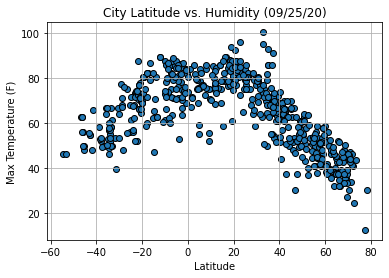

In [27]:
lat = city_df["lat"]
temp = city_df["max_temp_f"]

plt.title("City Latitude vs. Humidity (09/25/20)")
plt.scatter(lat, temp, edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("Images/max_temp_plot.png")
plt.show()

## Latitude vs. Humidity Plot

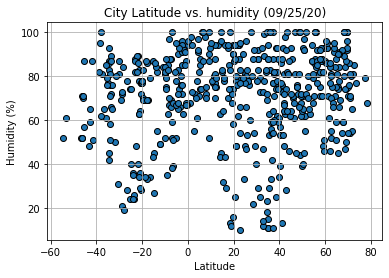

In [28]:
lat = city_df["lat"]
humidity = city_df["humidity"]

plt.title("City Latitude vs. humidity (09/25/20)")
plt.scatter(lat, humidity, edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("Images/humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

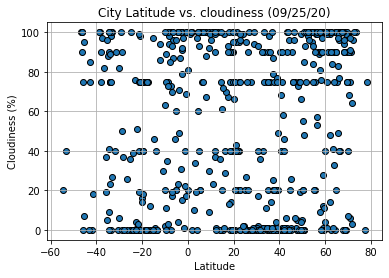

In [29]:
lat = city_df["lat"]
cloudiness = city_df["cloudiness"]

plt.title("City Latitude vs. cloudiness (09/25/20)")
plt.scatter(lat, cloudiness, edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("Images/cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

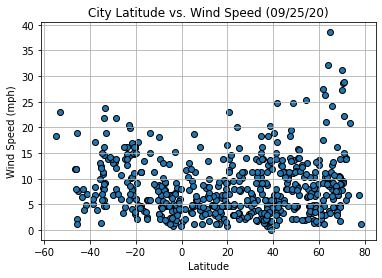

In [30]:
lat = city_df["lat"]
windspeed = city_df["windspeed"]

plt.title("City Latitude vs. Wind Speed (09/25/20)")
plt.scatter(lat, windspeed, edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("Images/windspeed.png")
plt.show()

## Linear Regression

In [ ]:
#create northern and southern hemispheres for plotting. 
southern_hem = city_df[city_df["lat"] < 0]
northern_hem = city_df[city_df["lat"] >= 0]

#create lat variables to use for each plot category
southern_lat = southern_hem["lat"]
northern_lat = northern_hem["lat"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression